# ForMoSA

## Performing the nested sampling

In [10]:

import sys
import numpy as np
import matplotlib.pyplot as plt

# Give the path to ForMoSA to be able to import it. No need when this will be a pip package
base_path = '/home/mravet/ForMoSA/ForMoSA' 
sys.path.append(base_path)

# for the interpolation & sampling
from main_utilities import yesno
from main_utilities import GlobFile
from adapt.adapt_obs_mod import launch_adapt
from nested_sampling.nested_sampling import launch_nested_sampling
from adapt.extraction_functions import continuum_estimate

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# for the plots
from plotting.plotting_class import ComplexRadar
from plotting.plotting_class import PlottingForMoSA


-> Configuration of environment

In [2]:
config_file_path = '/home/mravet/ForMoSA/DEMO/inputs/test_config_ABPicb.ini'

## CONFIG_FILE reading and defining global parameters
global_params = GlobFile(config_file_path)    


-> Initializing ForMoSA

In [3]:
# Have you already interpolated the grids for this data? 
#y_n_par = 'yes'
y_n_par = 'no'

launch_adapt(global_params, justobs=y_n_par)

/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/ForMoSA/adapt/extraction_functions.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ind_photometry = np.where(res[ind] == 'P')




-> To compare synthetic spectra with the observation we need to manage them. The following actions are performed:
- extraction -
- resizing on the observation's wavelength range -
- adjustement of the spectral resolution -
- substraction of the continuum (if needed) -

1/33 	- 	1/5 	- 	1/4 	- 	1/15 	- 	      Estimated time : 0h : 50m : 20s
1/33 	- 	1/5 	- 	1/4 	- 	2/15 	- 	      Estimated time : 0h : 6m : 59s
1/33 	- 	1/5 	- 	1/4 	- 	3/15 	- 	      Estimated time : 0h : 6m : 50s
1/33 	- 	1/5 	- 	1/4 	- 	4/15 	- 	      Estimated time : 0h : 7m : 22s
1/33 	- 	1/5 	- 	1/4 	- 	5/15 	- 	      Estimated time : 0h : 6m : 33s
1/33 	- 	1/5 	- 	1/4 	- 	6/15 	- 	      Estimated time : 0h : 8m : 24s
1/33 	- 	1/5 	- 	1/4 	- 	7/15 	- 	      Estimated time : 0h : 6m : 37s
1/33 	- 	1/5 	- 	1/4 	- 	8/15 	- 	      Estimated time : 0h : 6m : 23s
1/33 	- 	1/5 	- 	1/4 	- 	9/15 	- 	      Estimated time : 0h : 6m : 19s
1/33 	- 	1/5 	- 	1/4 	- 	10/15 	- 	      Estimated time : 0h : 6m : 7s
1/33 	- 	1/5 	- 	

-> Nested sampling

In [5]:
launch_nested_sampling(global_params)

/Users/ppalmabifani/opt/anaconda3/envs/exo_formosa/lib/python3.7/site-packages/nestle.py:840: UserWarning: You really want to make npoints >= 2 * ndim!
  warnings.warn("You really want to make npoints >= 2 * ndim!")


it=   342 logz=-1042.588845422082

########     The code spent 622.2305381298065 sec to run   ########
niter: 343
ncall: 19440
nsamples: 353
logz: -1042.319 +/-  1.767
h: 31.221





## Now we plot!

In [3]:
# Initialize the plotting class
plotForMoSA = PlottingForMoSA(config_file_path, 'magenta')

ForMoSA - Corner plot


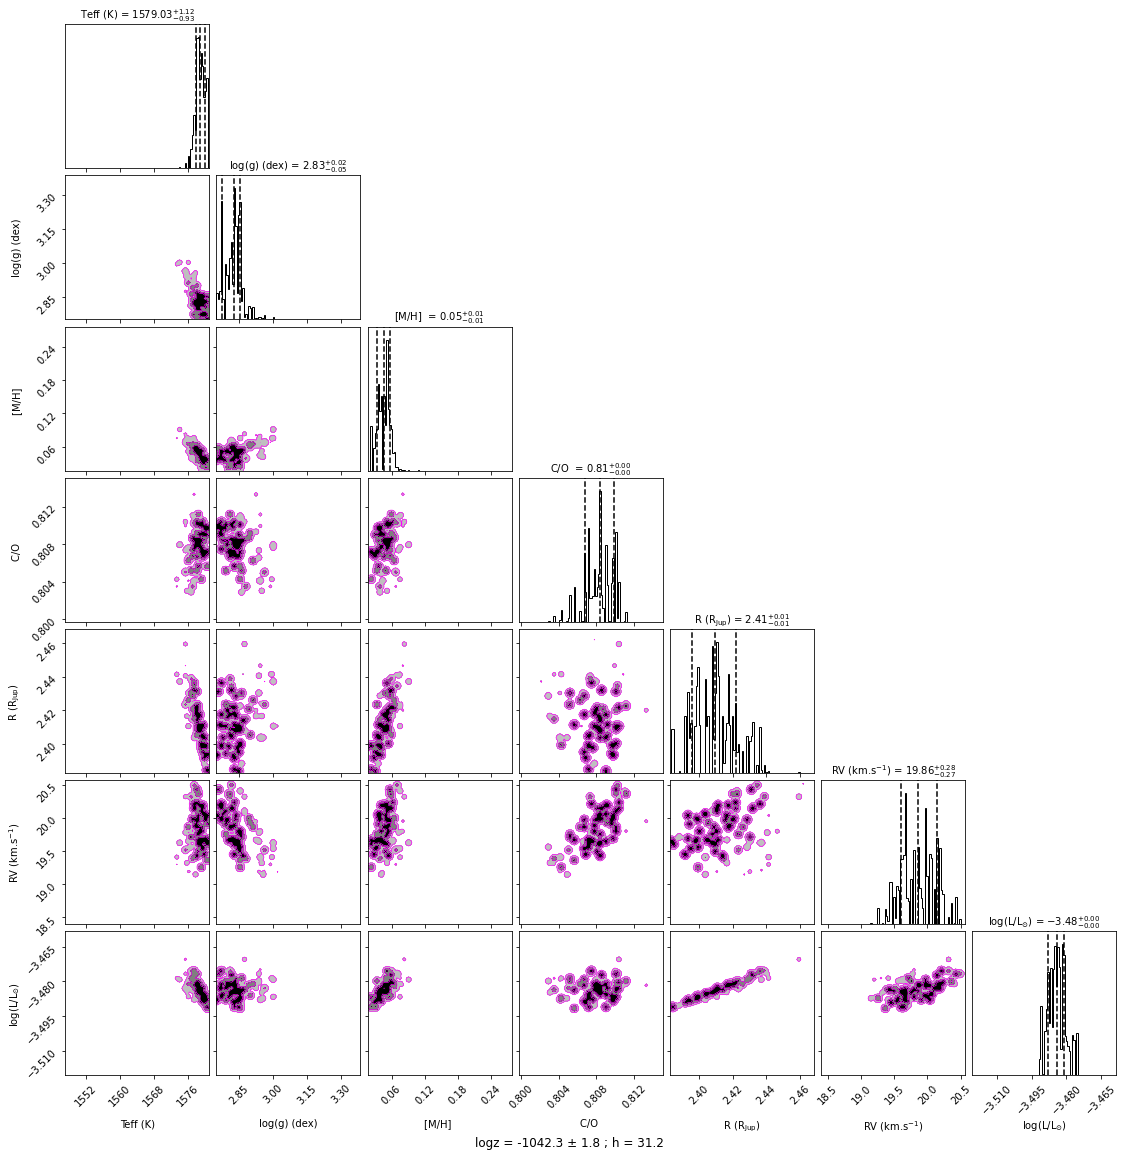

In [5]:
# PLOT: Corner plot
# plotting functions return the fig object -> you can edit the axes, overplot text/curves, save, etc...
plotForMoSA.plot_corner(levels_sig=[0.997, 0.95, 0.68], bins=100, quantiles=(0.16, 0.5, 0.84), burn_in=0)
#plt.savefig('') 
plt.show()


ForMoSA - Posteriors chains for each parameter


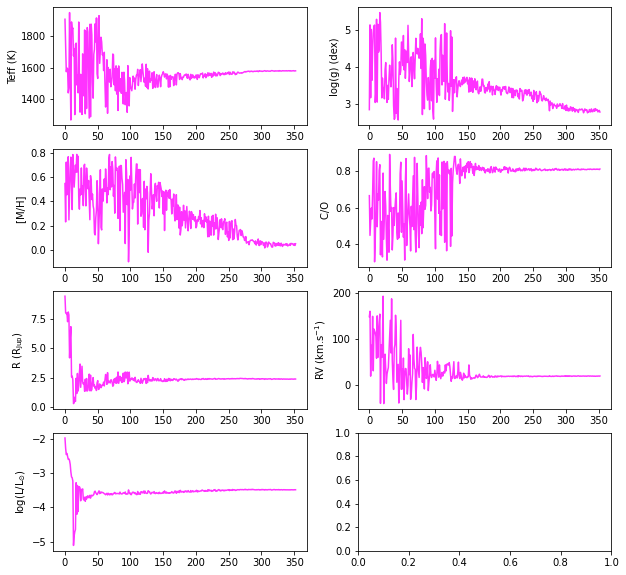

In [6]:
# PLOT: Chains of posteriors
plotForMoSA.plot_chains(figsize=(10,10))
#plt.savefig('')
plt.show()


In [7]:
# You can access to some parametes since we are working with a class
posteriors_chains = plotForMoSA.posterior_to_plot
posteriors_names = plotForMoSA.posteriors_names


ForMoSA - Radar plot


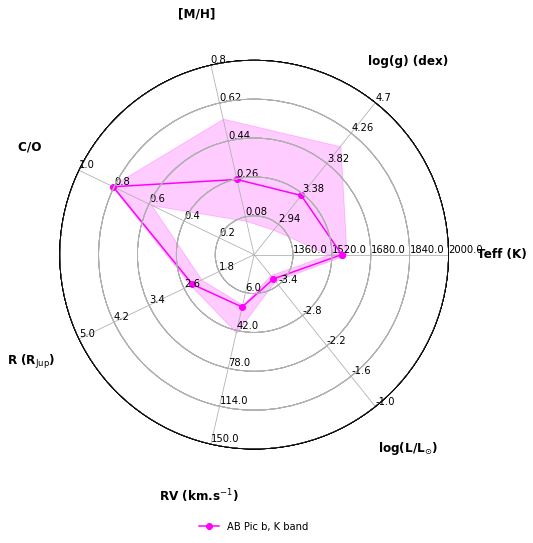

In [8]:
# PLOT: Radar plot
# You need to define the ranges for each parameter, looking at the chain plots can be useful
ranges = [(1200,2000),
          (2.5,4.7),
          (-0.1,0.8),
          (0,1),
          (1,5),
          (-30,150),
          (-4,-1)]
plotForMoSA.plot_radar(ranges,label='AB Pic b, K band',quantiles=[0.16, 0.5, 0.84],chiffres=[0,2,2,2])
plt.show()


ForMoSA - Best fit and residuals plot


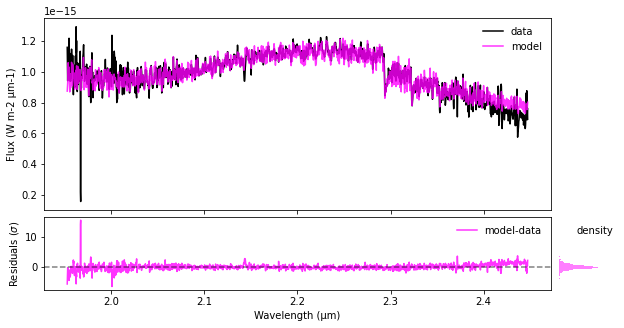

In [9]:
# PLOT: Spectra and residuals
plotForMoSA.plot_fit(figsize=(10, 5), uncert='no')
plt.show()


ForMoSA - Pressure-Temperature profile


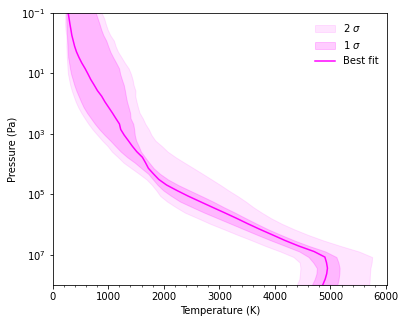

In [12]:
# PLOT: Pressure-Temperature profile
path_temp_profile = '/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/DEMO/outputs/pt_profiles/temperature_grid_xarray_ExoREM.nc'
plotForMoSA.plot_PT(path_temp_profile, figsize=(6,5))
plt.show()

ForMoSA - Cloud profiles


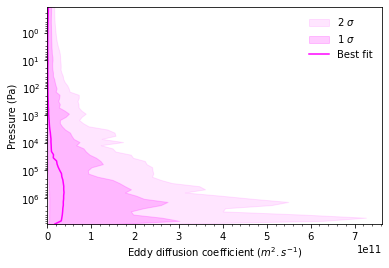

ForMoSA - Cloud profiles


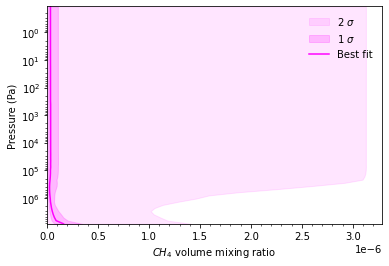

ForMoSA - Cloud profiles


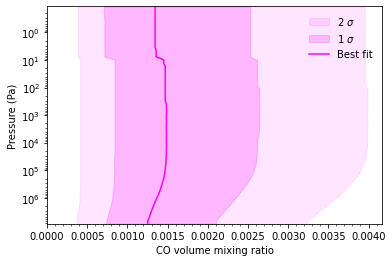

ForMoSA - Cloud profiles


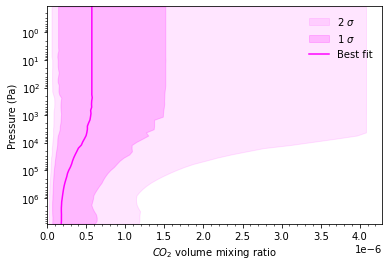

ForMoSA - Cloud profiles


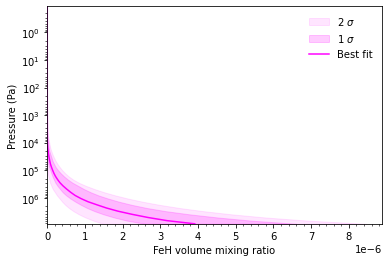

ForMoSA - Cloud profiles


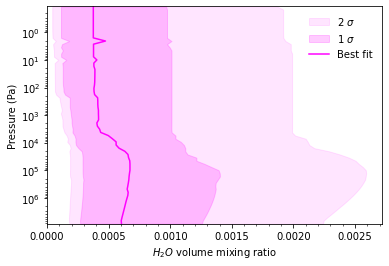

ForMoSA - Cloud profiles


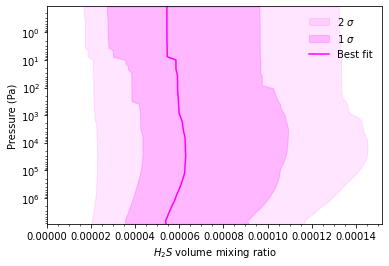

ForMoSA - Cloud profiles


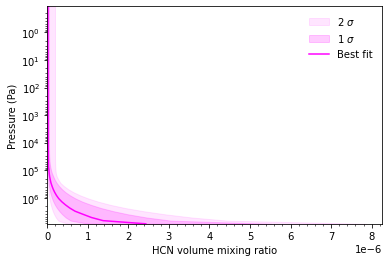

ForMoSA - Cloud profiles


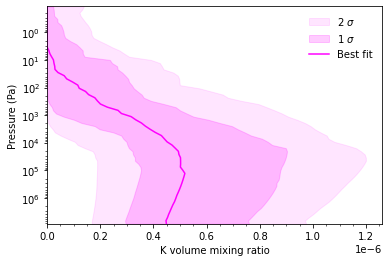

ForMoSA - Cloud profiles


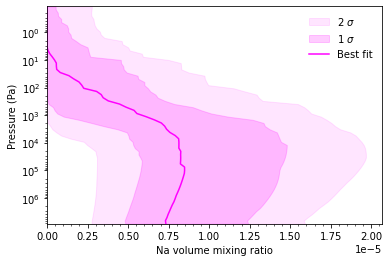

ForMoSA - Cloud profiles


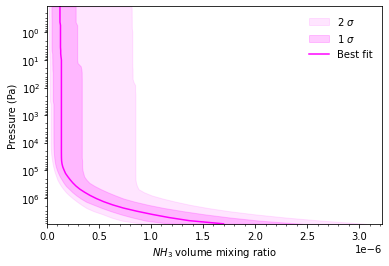

ForMoSA - Cloud profiles


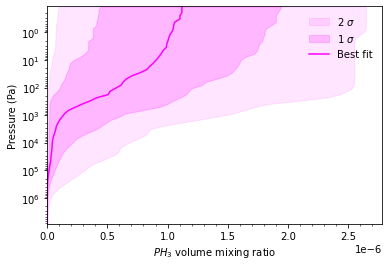

ForMoSA - Cloud profiles


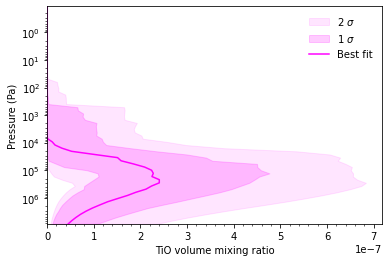

ForMoSA - Cloud profiles


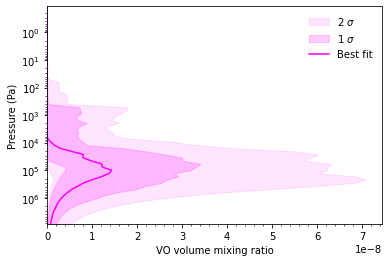

ForMoSA - Cloud profiles


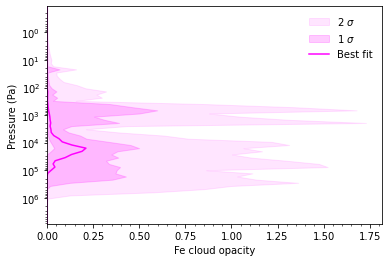

ForMoSA - Cloud profiles


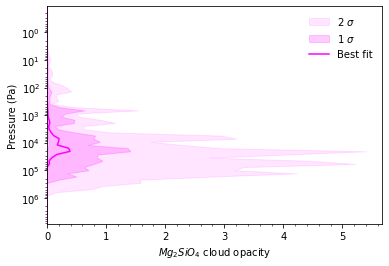

ForMoSA - Cloud profiles


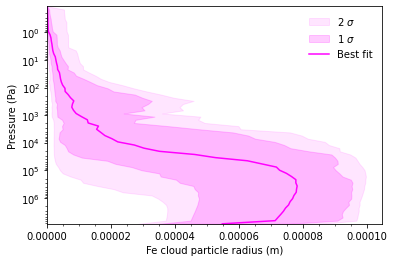

ForMoSA - Cloud profiles


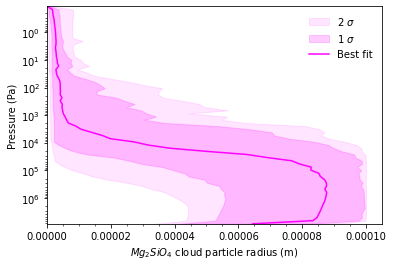

ForMoSA - Cloud profiles


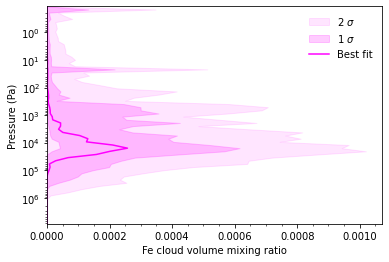

ForMoSA - Cloud profiles


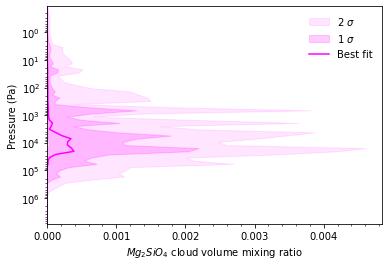

In [16]:
# PLOT: Clouds
path_temp_profile = '/Users/ppalmabifani/Desktop/exoAtm/c0_ForMoSA/ForMoSA/DEMO/outputs/pt_profiles/cloud_props_grids_xarray_ExoREM.nc'
clouds_list = ['eddy_diffusion_coefficient',
               'vmr_CH4',
               'vmr_CO',
               'vmr_CO2',
               'vmr_FeH',
               'vmr_H2O',
               'vmr_H2S',
               'vmr_HCN',
               'vmr_K',
               'vmr_Na',
               'vmr_NH3',
               'vmr_PH3',
               'vmr_TiO',
               'vmr_VO',
               'cloud_opacity_Fe',
               'cloud_opacity_Mg2SiO4',
               'cloud_particle_radius_Fe',
               'cloud_particle_radius_Mg2SiO4',
               'cloud_vmr_Fe',
               'cloud_vmr_Mg2SiO4']

for i in range(len(clouds_list)):
    plotForMoSA.plot_Clouds(clouds_list[i],path_temp_profile, figsize=(6,5))
    plt.show()